# 10 - Continuous Probability Distributions

**Continuous distributions:** For outcomes that can be any value in a range (height, time, temperature).

Common types:
- **Normal:** Bell curve, most values near the middle (heights, test scores)
- **Uniform:** All values equally likely (random number 0-1, fair spinner)
- **Exponential:** Waiting time between events (time until next order, bus wait)
- **Beta:** Uncertainty about probabilities (estimating conversion rates with limited data)

**Key Idea:** Unlike discrete (count outcomes), continuous distributions model measurements on a scale.

## Normal Distribution: Delivery Times

Packages arrive in average 48 hours with standard deviation 6 hours.

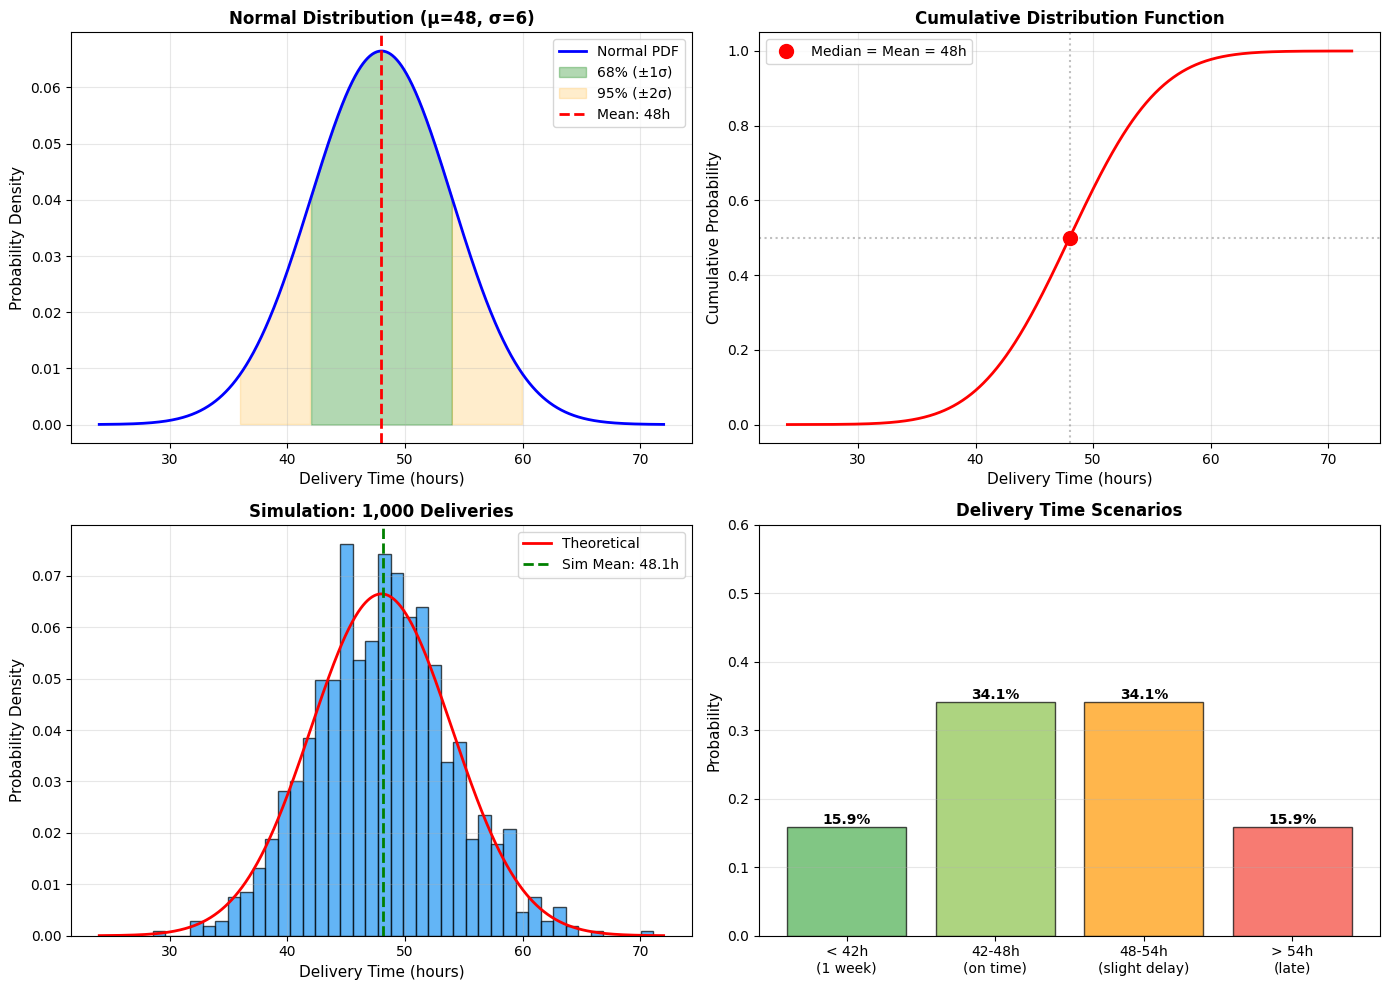


📦 Normal Distribution Analysis:

Delivery times: Mean = 48h, SD = 6h

📏 68-95-99.7 Rule:
   → 68% of deliveries: 42-54 hours
   → 95% of deliveries: 36-60 hours
   → 99.7% of deliveries: 30-66 hours

💡 Probability questions:
   → P(delivery < 42h) = 15.9%
   → P(delivery > 60h) = 2.3%
   → P(45h < delivery < 51h) = 38.3%

🎯 Business application:
   → Promise delivery in 60h to meet 97.5% of orders
   → Expect 2.3% of deliveries to exceed 60h


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Normal distribution parameters
mu = 48  # Mean: 48 hours
sigma = 6  # Standard deviation: 6 hours

# Generate distribution
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf = stats.norm.pdf(x, mu, sigma)
cdf = stats.norm.cdf(x, mu, sigma)

# Key points for 68-95-99.7 rule
one_sigma = (mu - sigma, mu + sigma)
two_sigma = (mu - 2*sigma, mu + 2*sigma)
three_sigma = (mu - 3*sigma, mu + 3*sigma)

# Simulate deliveries
np.random.seed(42)
simulated_deliveries = np.random.normal(mu, sigma, 1000)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# PDF with 68-95-99.7 rule
ax1 = axes[0, 0]
ax1.plot(x, pdf, 'b-', linewidth=2, label='Normal PDF')
ax1.fill_between(x, pdf, where=(x >= one_sigma[0]) & (x <= one_sigma[1]), 
                alpha=0.3, color='green', label='68% (±1σ)')
ax1.fill_between(x, pdf, where=((x >= two_sigma[0]) & (x < one_sigma[0])) | 
                ((x > one_sigma[1]) & (x <= two_sigma[1])), 
                alpha=0.2, color='orange', label='95% (±2σ)')
ax1.axvline(mu, color='red', linestyle='--', linewidth=2, label=f'Mean: {mu}h')
ax1.set_xlabel('Delivery Time (hours)', fontsize=11)
ax1.set_ylabel('Probability Density', fontsize=11)
ax1.set_title(f'Normal Distribution (μ={mu}, σ={sigma})', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# CDF
ax2 = axes[0, 1]
ax2.plot(x, cdf, 'r-', linewidth=2)
ax2.axhline(0.5, color='gray', linestyle=':', alpha=0.5)
ax2.axvline(mu, color='gray', linestyle=':', alpha=0.5)
ax2.plot(mu, 0.5, 'ro', markersize=10, label=f'Median = Mean = {mu}h')
ax2.set_xlabel('Delivery Time (hours)', fontsize=11)
ax2.set_ylabel('Cumulative Probability', fontsize=11)
ax2.set_title('Cumulative Distribution Function', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

# Simulation histogram
ax3 = axes[1, 0]
ax3.hist(simulated_deliveries, bins=40, density=True, alpha=0.7, color='#2196F3', edgecolor='black')
ax3.plot(x, pdf, 'r-', linewidth=2, label='Theoretical')
ax3.axvline(np.mean(simulated_deliveries), color='green', linestyle='--', linewidth=2,
           label=f'Sim Mean: {np.mean(simulated_deliveries):.1f}h')
ax3.set_xlabel('Delivery Time (hours)', fontsize=11)
ax3.set_ylabel('Probability Density', fontsize=11)
ax3.set_title('Simulation: 1,000 Deliveries', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# Probability scenarios
ax4 = axes[1, 1]
scenarios = ['< 42h\n(1 week)', '42-48h\n(on time)', '48-54h\n(slight delay)', '> 54h\n(late)']
probs = [
    stats.norm.cdf(42, mu, sigma),
    stats.norm.cdf(48, mu, sigma) - stats.norm.cdf(42, mu, sigma),
    stats.norm.cdf(54, mu, sigma) - stats.norm.cdf(48, mu, sigma),
    1 - stats.norm.cdf(54, mu, sigma)
]
colors_scenarios = ['#4CAF50', '#8BC34A', '#FF9800', '#F44336']
bars = ax4.bar(range(len(scenarios)), probs, color=colors_scenarios, alpha=0.7, edgecolor='black')
ax4.set_xticks(range(len(scenarios)))
ax4.set_xticklabels(scenarios)
ax4.set_ylabel('Probability', fontsize=11)
ax4.set_title('Delivery Time Scenarios', fontsize=12, fontweight='bold')
ax4.set_ylim(0, 0.6)
ax4.grid(axis='y', alpha=0.3)
for bar, val in zip(bars, probs):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.1%}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📦 Normal Distribution Analysis:")
print(f"\nDelivery times: Mean = {mu}h, SD = {sigma}h")

print(f"\n📏 68-95-99.7 Rule:")
print(f"   → 68% of deliveries: {one_sigma[0]}-{one_sigma[1]} hours")
print(f"   → 95% of deliveries: {two_sigma[0]}-{two_sigma[1]} hours")
print(f"   → 99.7% of deliveries: {three_sigma[0]}-{three_sigma[1]} hours")

print(f"\n💡 Probability questions:")
prob_under_42 = stats.norm.cdf(42, mu, sigma)
prob_over_60 = 1 - stats.norm.cdf(60, mu, sigma)
prob_45_to_51 = stats.norm.cdf(51, mu, sigma) - stats.norm.cdf(45, mu, sigma)
print(f"   → P(delivery < 42h) = {prob_under_42:.1%}")
print(f"   → P(delivery > 60h) = {prob_over_60:.1%}")
print(f"   → P(45h < delivery < 51h) = {prob_45_to_51:.1%}")

print(f"\n🎯 Business application:")
print(f"   → Promise delivery in {mu + 2*sigma:.0f}h to meet 97.5% of orders")
print(f"   → Expect {prob_over_60*100:.1f}% of deliveries to exceed 60h")

## Exponential Distribution: Time Between Orders

Average 10 minutes between online orders. How long until next order?

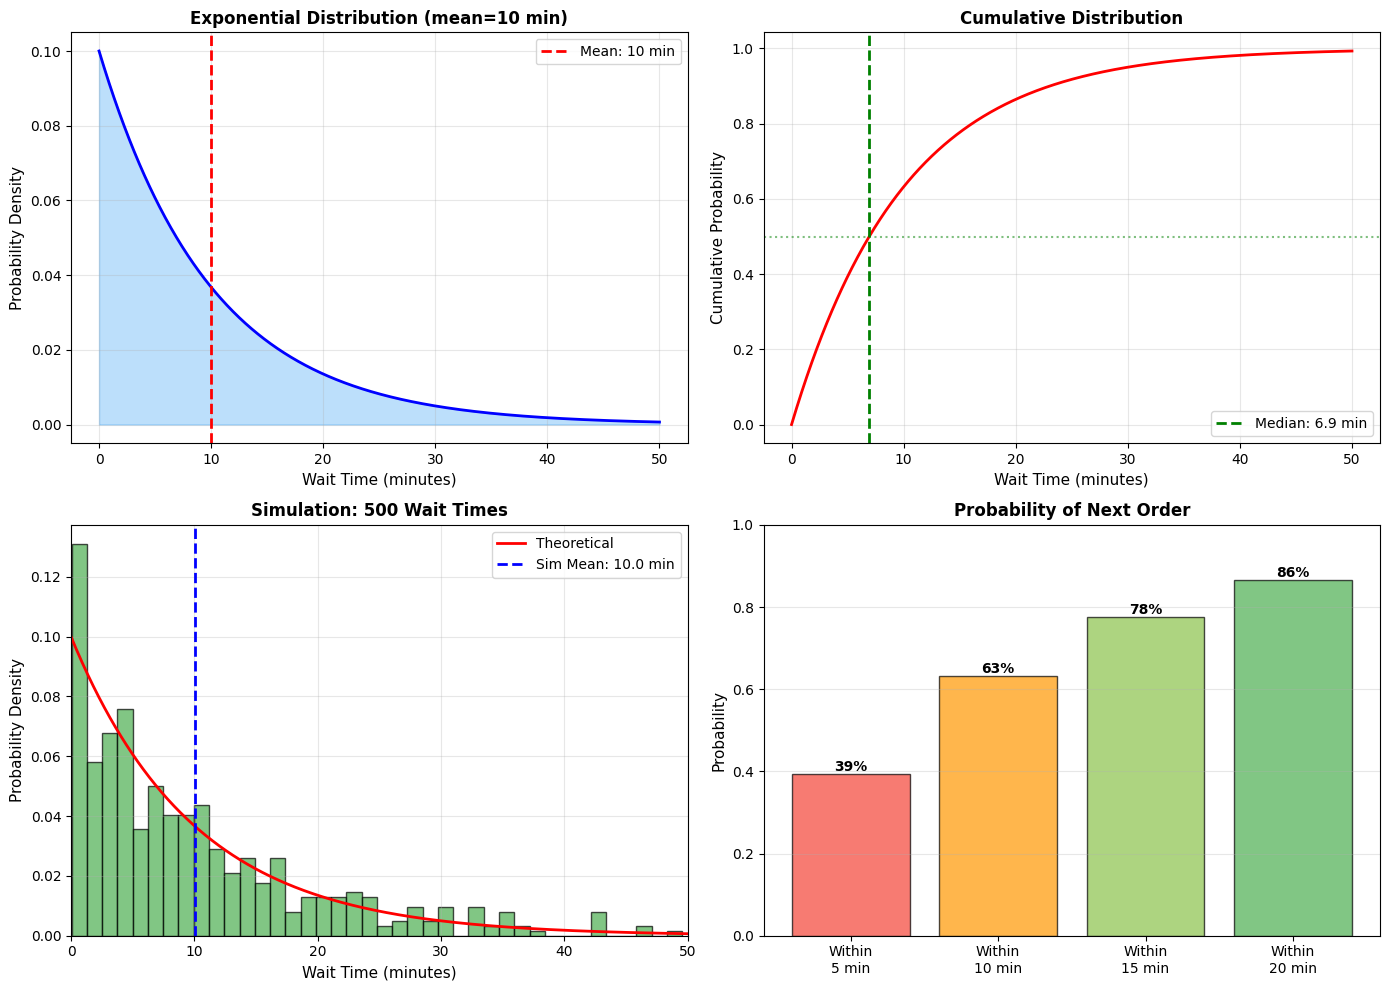


⏱️ Exponential Distribution Analysis:

Scenario: Average 10 minutes between orders

📊 Key characteristics:
   → Mean = 10 min
   → Median = 6.9 min (shorter than mean - right skewed!)
   → SD = 10 min (equals mean for exponential)

💡 Probability insights:
   → P(wait < 5 min) = 39% (lots of quick orders)
   → P(wait > 20 min) = 14% (occasionally long waits)
   → P(5 < wait < 15 min) = 38%

🎯 Business implications:
   → Many short waits, few long waits (right-skewed)
   → Memoryless property: past doesn't affect future wait
   → Used for: time between events, customer service queues


In [2]:
# Exponential parameter
mean_wait = 10  # Average 10 minutes between orders
lambda_rate = 1 / mean_wait  # Rate parameter

# Generate distribution
x_exp = np.linspace(0, 50, 1000)
pdf_exp = stats.expon.pdf(x_exp, scale=mean_wait)
cdf_exp = stats.expon.cdf(x_exp, scale=mean_wait)

# Simulate
np.random.seed(42)
simulated_waits = np.random.exponential(mean_wait, 500)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# PDF
ax1 = axes[0, 0]
ax1.plot(x_exp, pdf_exp, 'b-', linewidth=2)
ax1.fill_between(x_exp, pdf_exp, alpha=0.3, color='#2196F3')
ax1.axvline(mean_wait, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_wait} min')
ax1.set_xlabel('Wait Time (minutes)', fontsize=11)
ax1.set_ylabel('Probability Density', fontsize=11)
ax1.set_title(f'Exponential Distribution (mean={mean_wait} min)', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# CDF
ax2 = axes[0, 1]
ax2.plot(x_exp, cdf_exp, 'r-', linewidth=2)
median_wait = stats.expon.median(scale=mean_wait)
ax2.axvline(median_wait, color='green', linestyle='--', linewidth=2, label=f'Median: {median_wait:.1f} min')
ax2.axhline(0.5, color='green', linestyle=':', alpha=0.5)
ax2.set_xlabel('Wait Time (minutes)', fontsize=11)
ax2.set_ylabel('Cumulative Probability', fontsize=11)
ax2.set_title('Cumulative Distribution', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

# Simulation
ax3 = axes[1, 0]
ax3.hist(simulated_waits, bins=40, density=True, alpha=0.7, color='#4CAF50', edgecolor='black')
ax3.plot(x_exp, pdf_exp, 'r-', linewidth=2, label='Theoretical')
ax3.axvline(np.mean(simulated_waits), color='blue', linestyle='--', linewidth=2,
           label=f'Sim Mean: {np.mean(simulated_waits):.1f} min')
ax3.set_xlabel('Wait Time (minutes)', fontsize=11)
ax3.set_ylabel('Probability Density', fontsize=11)
ax3.set_title('Simulation: 500 Wait Times', fontsize=12, fontweight='bold')
ax3.set_xlim(0, 50)
ax3.legend()
ax3.grid(alpha=0.3)

# Wait time probabilities
ax4 = axes[1, 1]
wait_times = [5, 10, 15, 20]
prob_within = [stats.expon.cdf(t, scale=mean_wait) for t in wait_times]
colors_wait = ['#F44336', '#FF9800', '#8BC34A', '#4CAF50']
bars = ax4.bar(range(len(wait_times)), prob_within, color=colors_wait, alpha=0.7, edgecolor='black')
ax4.set_xticks(range(len(wait_times)))
ax4.set_xticklabels([f'Within\n{t} min' for t in wait_times])
ax4.set_ylabel('Probability', fontsize=11)
ax4.set_title('Probability of Next Order', fontsize=12, fontweight='bold')
ax4.set_ylim(0, 1)
ax4.grid(axis='y', alpha=0.3)
for bar, val in zip(bars, prob_within):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.0%}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n⏱️ Exponential Distribution Analysis:")
print(f"\nScenario: Average {mean_wait} minutes between orders")

print(f"\n📊 Key characteristics:")
print(f"   → Mean = {mean_wait} min")
print(f"   → Median = {median_wait:.1f} min (shorter than mean - right skewed!)")
print(f"   → SD = {mean_wait} min (equals mean for exponential)")

print(f"\n💡 Probability insights:")
prob_under_5 = stats.expon.cdf(5, scale=mean_wait)
prob_over_20 = 1 - stats.expon.cdf(20, scale=mean_wait)
prob_5_to_15 = stats.expon.cdf(15, scale=mean_wait) - stats.expon.cdf(5, scale=mean_wait)
print(f"   → P(wait < 5 min) = {prob_under_5:.0%} (lots of quick orders)")
print(f"   → P(wait > 20 min) = {prob_over_20:.0%} (occasionally long waits)")
print(f"   → P(5 < wait < 15 min) = {prob_5_to_15:.0%}")

print(f"\n🎯 Business implications:")
print(f"   → Many short waits, few long waits (right-skewed)")
print(f"   → Memoryless property: past doesn't affect future wait")
print(f"   → Used for: time between events, customer service queues")

## Beta Distribution: Estimating Conversion Rates

New product: 7 out of 10 people clicked. What's the true conversion rate?

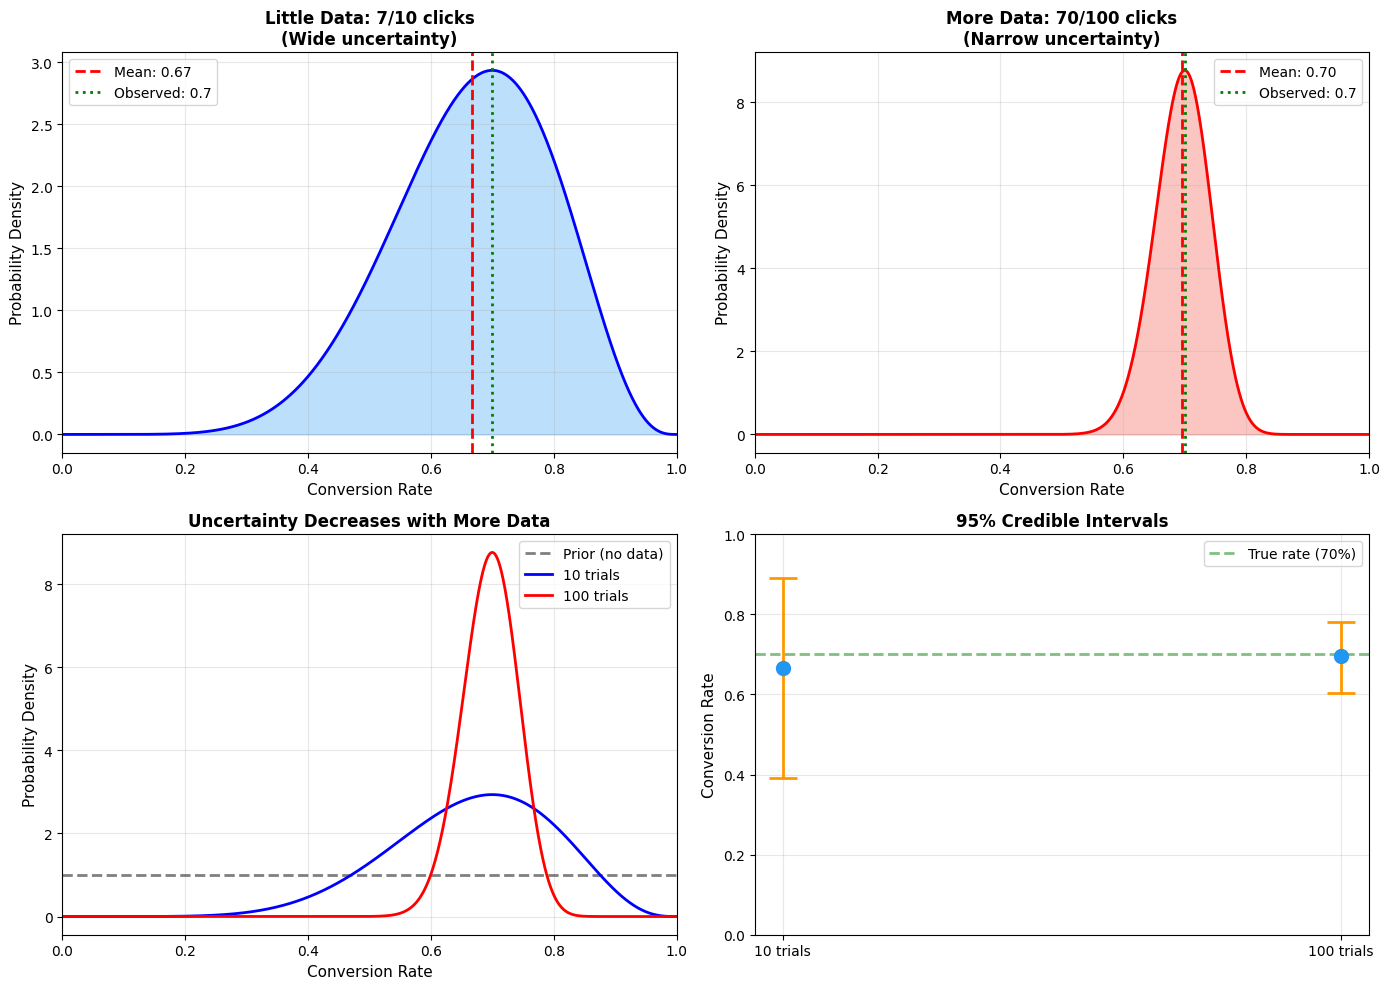


🎯 Beta Distribution for Conversion Rate Estimation:

Little data (10 trials, 7 clicks):
   → Estimated rate: 66.7%
   → 95% credible interval: [39.0%, 89.1%]
   → Wide range = High uncertainty

More data (100 trials, 70 clicks):
   → Estimated rate: 69.6%
   → 95% credible interval: [60.4%, 78.1%]
   → Narrow range = Low uncertainty

💡 Key insights:
   → Small data interval width: 50.0%
   → Large data interval width: 17.7%
   → 2.8x more uncertainty with less data

🎯 Business applications:
   → A/B testing: Estimate true conversion rates
   → Early product testing: Wide intervals = need more data
   → Bayesian approach: Updates beliefs as data accumulates


In [3]:
# Beta distribution for conversion rate estimation
# Start with uniform prior (α=1, β=1), then update with data

# Little data: 7 clicks out of 10 trials
clicks_small = 7
trials_small = 10
alpha_small = clicks_small + 1
beta_small = (trials_small - clicks_small) + 1

# More data: 70 clicks out of 100 trials (same rate)
clicks_large = 70
trials_large = 100
alpha_large = clicks_large + 1
beta_large = (trials_large - clicks_large) + 1

# Generate distributions
x_beta = np.linspace(0, 1, 1000)
pdf_small = stats.beta.pdf(x_beta, alpha_small, beta_small)
pdf_large = stats.beta.pdf(x_beta, alpha_large, beta_large)
pdf_prior = stats.beta.pdf(x_beta, 1, 1)  # Uniform prior

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Small data
ax1 = axes[0, 0]
ax1.plot(x_beta, pdf_small, 'b-', linewidth=2)
ax1.fill_between(x_beta, pdf_small, alpha=0.3, color='#2196F3')
mean_small = alpha_small / (alpha_small + beta_small)
ax1.axvline(mean_small, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_small:.2f}')
ax1.axvline(clicks_small/trials_small, color='green', linestyle=':', linewidth=2, label=f'Observed: {clicks_small/trials_small:.1f}')
ax1.set_xlabel('Conversion Rate', fontsize=11)
ax1.set_ylabel('Probability Density', fontsize=11)
ax1.set_title(f'Little Data: {clicks_small}/{trials_small} clicks\n(Wide uncertainty)', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)
ax1.set_xlim(0, 1)

# Large data
ax2 = axes[0, 1]
ax2.plot(x_beta, pdf_large, 'r-', linewidth=2)
ax2.fill_between(x_beta, pdf_large, alpha=0.3, color='#F44336')
mean_large = alpha_large / (alpha_large + beta_large)
ax2.axvline(mean_large, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_large:.2f}')
ax2.axvline(clicks_large/trials_large, color='green', linestyle=':', linewidth=2, label=f'Observed: {clicks_large/trials_large:.1f}')
ax2.set_xlabel('Conversion Rate', fontsize=11)
ax2.set_ylabel('Probability Density', fontsize=11)
ax2.set_title(f'More Data: {clicks_large}/{trials_large} clicks\n(Narrow uncertainty)', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)
ax2.set_xlim(0, 1)

# Comparison
ax3 = axes[1, 0]
ax3.plot(x_beta, pdf_prior, 'k--', linewidth=2, label='Prior (no data)', alpha=0.5)
ax3.plot(x_beta, pdf_small, 'b-', linewidth=2, label=f'{trials_small} trials')
ax3.plot(x_beta, pdf_large, 'r-', linewidth=2, label=f'{trials_large} trials')
ax3.set_xlabel('Conversion Rate', fontsize=11)
ax3.set_ylabel('Probability Density', fontsize=11)
ax3.set_title('Uncertainty Decreases with More Data', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)
ax3.set_xlim(0, 1)

# Credible intervals
ax4 = axes[1, 1]
ci_small = stats.beta.interval(0.95, alpha_small, beta_small)
ci_large = stats.beta.interval(0.95, alpha_large, beta_large)

scenarios = ['10 trials', '100 trials']
means = [mean_small, mean_large]
lower = [ci_small[0], ci_large[0]]
upper = [ci_small[1], ci_large[1]]
errors_lower = [means[i] - lower[i] for i in range(2)]
errors_upper = [upper[i] - means[i] for i in range(2)]

ax4.errorbar(range(len(scenarios)), means, 
            yerr=[errors_lower, errors_upper],
            fmt='o', markersize=10, capsize=10, capthick=2, linewidth=2,
            color='#2196F3', ecolor='#FF9800')
ax4.axhline(0.7, color='green', linestyle='--', linewidth=2, alpha=0.5, label='True rate (70%)')
ax4.set_xticks(range(len(scenarios)))
ax4.set_xticklabels(scenarios)
ax4.set_ylabel('Conversion Rate', fontsize=11)
ax4.set_title('95% Credible Intervals', fontsize=12, fontweight='bold')
ax4.set_ylim(0, 1)
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎯 Beta Distribution for Conversion Rate Estimation:")

print(f"\nLittle data ({trials_small} trials, {clicks_small} clicks):")
print(f"   → Estimated rate: {mean_small:.1%}")
print(f"   → 95% credible interval: [{ci_small[0]:.1%}, {ci_small[1]:.1%}]")
print(f"   → Wide range = High uncertainty")

print(f"\nMore data ({trials_large} trials, {clicks_large} clicks):")
print(f"   → Estimated rate: {mean_large:.1%}")
print(f"   → 95% credible interval: [{ci_large[0]:.1%}, {ci_large[1]:.1%}]")
print(f"   → Narrow range = Low uncertainty")

print(f"\n💡 Key insights:")
interval_width_small = ci_small[1] - ci_small[0]
interval_width_large = ci_large[1] - ci_large[0]
print(f"   → Small data interval width: {interval_width_small:.1%}")
print(f"   → Large data interval width: {interval_width_large:.1%}")
print(f"   → {interval_width_small/interval_width_large:.1f}x more uncertainty with less data")

print(f"\n🎯 Business applications:")
print(f"   → A/B testing: Estimate true conversion rates")
print(f"   → Early product testing: Wide intervals = need more data")
print(f"   → Bayesian approach: Updates beliefs as data accumulates")

## Summary: Continuous Distributions

| Distribution | Shape | Use When | Example |
|--------------|-------|----------|----------|
| **Normal** | Bell curve | Many small factors add up | Heights, delivery times, test scores |
| **Uniform** | Flat | All values equally likely | Random number generator, fair spinner |
| **Exponential** | Right-skewed | Waiting times between events | Time until next order, customer arrival |
| **Beta** | Flexible (0-1) | Uncertainty about probabilities | Conversion rate with limited data |

### Key Characteristics

**Normal:**
- Symmetric, bell-shaped
- 68-95-99.7 rule for standard deviations
- Mean = Median = Mode
- Most common in nature and measurements

**Exponential:**
- Right-skewed (long tail to right)
- Memoryless property
- Median < Mean
- Many short waits, few long waits

**Beta:**
- Bounded between 0 and 1
- Flexible shape (can be uniform, U-shaped, bell-shaped)
- Gets narrower with more data
- Perfect for probabilities and proportions

### Real-World Applications
- **Quality control:** Normal distribution for measurements
- **Delivery logistics:** Normal for delivery times, exponential for wait times
- **Customer service:** Exponential for time between arrivals
- **A/B testing:** Beta for conversion rate estimation
- **Finance:** Normal for returns (though real data has heavier tails)

**Remember:** Continuous distributions model measurements on a scale, not discrete counts!